# Importing libraries

In [ ]:
import numpy as np
import time
from matplotlib import pyplot as plt

# Initialization

In [2]:
iterations = 40
k = 20
regularization_factor = 0.1     #lambda
learning_rate= 0.01
data_path = "Put your input File Path"

### Plot Function

In [3]:
def plot_error(error,title,xlabel,ylabel):
    fig = plt.figure(figsize=(14,8))
    plt.gca().set_xticks(list(range(1,len(error)+1)))
    plt.plot(list(range(1,len(error)+1)),error)
    fig.suptitle(title, fontsize=20)
    plt.xlabel(xlabel,fontsize=18)
    plt.ylabel(ylabel,fontsize=18)
    plt.show()

# Latent Factor Recommender

In [4]:
def latent_factor_recommnder(data_path, regularization_factor, learning_rate, iterations, k):
    
    P = np.random.uniform(low=0, high=np.sqrt(5/k), size=(1,k))    # For movies
    Q = np.random.uniform(low=0, high=np.sqrt(5/k), size=(1,k))    # For users

    error_list = []
    for i in range(iterations):
        with open(data_path) as f:
            for line in f:
                line = np.fromstring(line,dtype=int,sep=',')

                movie_id = line[0]
                user_id = line[1]
                rating = line[2]

                if (movie_id+1 > P.shape[0]):
                    P = np.append(P, np.random.uniform(low=0, high=np.sqrt(5/k), size=(movie_id+1-P.shape[0],k)), axis = 0)

                if (user_id+1 > Q.shape[0]):
                    Q = np.append(Q, np.random.uniform(low=0, high=np.sqrt(5/k), size=(user_id+1-Q.shape[0],k)), axis = 0)

                # derivative of error
                err_der = 2*(rating - np.dot(np.array([Q[user_id]]),  np.array([P[movie_id]]).T)[0][0])

                # updating q and p
                q = Q[user_id] + learning_rate * (err_der*P[movie_id] - 2*regularization_factor*Q[user_id])

                p = P[movie_id] + learning_rate * (err_der*Q[user_id] - 2*regularization_factor*P[movie_id])

                Q[user_id] = q
                P[movie_id] = p            

        # predicting ratings
        R_pred = np.dot(P,Q.T)

        # Calculating error
        E1 = 0
        with open(data_path) as f:
            for line in f:
                line = np.fromstring(line,dtype=int,sep=',')

                movie_id = line[0]
                user_id = line[1]
                rating = line[2]

                E1 = E1 + np.square(rating - R_pred[movie_id, user_id])

        p_norm = np.sum(np.square(np.linalg.norm(P,ord=2,axis=1)))
        q_norm = np.sum(np.square(np.linalg.norm(Q,ord=2,axis=1)))

        error = E1 + regularization_factor * (p_norm + q_norm)

        error_list.append(error)

        print("Iteration ",i," : ",error)
        
    return error_list

In [5]:
Error_list = latent_factor_recommnder(data_path, regularization_factor, learning_rate, iterations, k)

Iteration  0  :  178108.93098515293
Iteration  1  :  96727.48225135132
Iteration  2  :  91063.66422106678
Iteration  3  :  88407.6066015003
Iteration  4  :  86548.58330472797
Iteration  5  :  84948.8344059131
Iteration  6  :  83393.76386407533
Iteration  7  :  81775.84691877672
Iteration  8  :  80043.30403456689
Iteration  9  :  78187.92665459617
Iteration  10  :  76238.68208843253
Iteration  11  :  74248.3463834351
Iteration  12  :  72274.23331920263
Iteration  13  :  70362.79659457586
Iteration  14  :  68544.23034192694
Iteration  15  :  66834.5444977567
Iteration  16  :  65239.87264870926
Iteration  17  :  63760.13781512228
Iteration  18  :  62391.540681526385
Iteration  19  :  61128.15814142046
Iteration  20  :  59962.97596782376
Iteration  21  :  58888.56014424595
Iteration  22  :  57897.48611524152
Iteration  23  :  56982.60152654067
Iteration  24  :  56137.175162785
Iteration  25  :  55354.970160321725
Iteration  26  :  54630.26858682795
Iteration  27  :  53957.866010788224
Iter

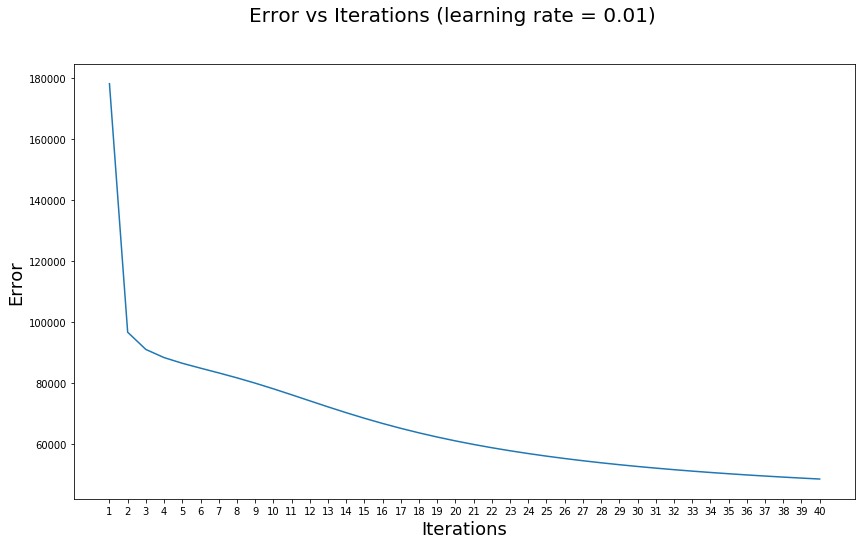

In [6]:
plot_error(Error_list,"Error vs Iterations (learning rate = "+str(learning_rate)+")","Iterations","Error")